In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
dataset = pd.read_csv('avocado.csv')
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Month'] = dataset['Date'].apply(lambda x:x.month)
dataset['Day'] = dataset['Date'].apply(lambda x:x.day)
dataset_us = dataset[dataset['region'] == 'TotalUS']
dataset_us.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
2652,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS,12,27
2653,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS,12,20
2654,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS,12,13
2655,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS,12,6
2656,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS,11,29


In [89]:
# dataset_array = dataset_us.to_numpy()
# volume = dataset_array[:,2]
# plt.hist(volume)
# plt.xlabel('Total volume')
# plt.title('Total volume')

In [151]:
dataset_2bp = pd.get_dummies(dataset_us)
dataset_2bp = dataset_2bp.iloc[15:165,:]

In [152]:
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate # split data randomly into train and test subsets
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler # standarization
from sklearn import metrics
from sklearn import svm

In [153]:
# X year-month-day
X=dataset_2bp.iloc[:,[2,10,11,12]]      # 选feature
# X=dataset_2bp.iloc[:,2:14]              # all features
y=dataset_2bp['AveragePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# std_trans = StandardScaler()
# X_train = std_trans.fit_transform(X_train)
# X_test = std_trans.transform(X_test)
dataset_2bp.info

<bound method DataFrame.info of            Date  AveragePrice  Total Volume         4046         4225  \
2667 2015-09-13          1.03   31245835.65   9875018.48  14888077.69   
2668 2015-09-06          1.02   33526480.08  12569277.14  14245598.38   
2669 2015-08-30          1.07   29761638.48  11650976.87  11995960.83   
2670 2015-08-23          1.08   29699845.61  11283021.31  12551529.70   
2671 2015-08-16          1.05   31936856.18  12680252.48  12998327.25   
...         ...           ...           ...          ...          ...   
9093 2018-03-04          1.07   40741214.05  14439547.46  11289307.37   
9094 2018-02-25          1.06   40021528.76  13829857.87  10415463.59   
9095 2018-02-18          1.08   36709887.49  13262751.42  10491918.44   
9096 2018-02-11          0.97   43167806.09  15870677.70  11541844.87   
9097 2018-02-04          0.87   62505646.52  21620180.90  20445501.03   

            4770   Total Bags   Small Bags  Large Bags  XLarge Bags  year  \
2667  1118988.

In [154]:
lr=LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

# perform cross-validation
cv_score = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))

print("Model Report for linear regression")
print('MAE:', metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_lr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))
print('CV Score:', cv_score)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, pred_lr))
print(metrics.explained_variance_score(y_test, pred_lr))

X_train.shape, y_train.shape,X_test.shape, y_test.shape, pred_lr.shape

Model Report for linear regression
MAE: 0.07028186771943788
MSE: 0.007125933193785832
RMSE: 0.08441524266260111
CV Score: 0.12098184424048089
Coefficient of determination: 0.76
0.7595553310954012


((120, 4), (120,), (30, 4), (30,), (30,))

In [155]:
regr = svm.SVR()
regr.fit(X_train,y_train)
pred_svm = regr.predict(X_test)

# perform cross-validation
cv_score = cross_val_score(regr, X, y, scoring='neg_root_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))

print("Model Report for linear regression")
print('MAE:', metrics.mean_absolute_error(y_test, pred_svm))
print('MSE:', metrics.mean_squared_error(y_test, pred_svm))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_svm)))
print('CV Score:', cv_score)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, pred_svm))
print(metrics.explained_variance_score(y_test, pred_svm))
X_train.shape, y_train.shape,X_test.shape, y_test.shape, pred_svm.shape

Model Report for linear regression
MAE: 0.11287713880822887
MSE: 0.017788463418816545
RMSE: 0.1333733984676725
CV Score: 0.15484217704235323
Coefficient of determination: 0.40
0.3973642032821696


((120, 4), (120,), (30, 4), (30,), (30,))

In [156]:
ebr = BayesianRidge()
ebr.fit(X_train, y_train)
pred_ebr = ebr.predict(X_test)

print("Model Report for Empirical Bayesian regression")
print('MAE:', metrics.mean_absolute_error(y_test, pred_ebr))
print('MSE:', metrics.mean_squared_error(y_test, pred_ebr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ebr)))
print('CV Score:', cv_score)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, pred_ebr))
print('variance:', metrics.explained_variance_score(y_test, pred_ebr))

Model Report for Empirical Bayesian regression
MAE: 0.07049791558011899
MSE: 0.007100226451890209
RMSE: 0.08426284146579802
CV Score: 0.15484217704235323
Coefficient of determination: 0.76
variance: 0.7603851065314908


In [157]:
class BayesianRegression():
    """
    Bayesian regression model

    w ~ N(w|0, alpha^(-1)I)
    y = X @ w
    t ~ N(t|X @ w, beta^(-1))
    """

    def __init__(self, alpha:float=1., beta:float=1.):
        self.alpha = alpha
        self.beta = beta
        self.w_mean = None
        self.w_precision = None

    def _is_prior_defined(self) -> bool:
        return self.w_mean is not None and self.w_precision is not None

    def _get_prior(self, ndim:int) -> tuple:
        if self._is_prior_defined():
            return self.w_mean, self.w_precision
        else:
            return np.zeros(ndim), self.alpha * np.eye(ndim)

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        bayesian update of parameters given training dataset

        Parameters
        ----------
        X : (N, n_features) np.ndarray
            training data independent variable
        t : (N,) np.ndarray
            training data dependent variable
        """

        mean_prev, precision_prev = self._get_prior(np.size(X, 1))

        w_precision = precision_prev + self.beta * X.T @ X
        w_mean = np.linalg.solve(
            w_precision,
            precision_prev @ mean_prev + self.beta * X.T @ t
        )
        self.w_mean = w_mean
        self.w_precision = w_precision
        self.w_cov = np.linalg.inv(self.w_precision)

    def predict(self, X:np.ndarray, return_std:bool=False, sample_size:int=None):
        """
        return mean (and standard deviation) of predictive distribution

        Parameters
        ----------
        X : (N, n_features) np.ndarray
            independent variable
        return_std : bool, optional
            flag to return standard deviation (the default is False)
        sample_size : int, optional
            number of samples to draw from the predictive distribution
            (the default is None, no sampling from the distribution)

        Returns
        -------
        y : (N,) np.ndarray
            mean of the predictive distribution
        y_std : (N,) np.ndarray
            standard deviation of the predictive distribution
        y_sample : (N, sample_size) np.ndarray
            samples from the predictive distribution
        """

        if sample_size is not None:
            w_sample = np.random.multivariate_normal(
                self.w_mean, self.w_cov, size=sample_size
            )
            y_sample = X @ w_sample.T
            return y_sample
        y = X @ self.w_mean
        if return_std:
            y_var = 1 / self.beta + np.sum(X @ self.w_cov * X, axis=1)
            y_std = np.sqrt(y_var)
            return y, y_std
        return y
    def _log_likelihood(self, X, t, w):
        return -0.5 * self.beta * np.square(t - X @ w).sum()

In [158]:
br = BayesianRegression(alpha=1, beta=100.)
br.fit(X_train, y_train)
pred_br = br.predict(X_test)

print("Model Report for Empirical Bayesian regression")
print('MAE:', metrics.mean_absolute_error(y_test, pred_br))
print('MSE:', metrics.mean_squared_error(y_test,pred_br))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_br)))
print('CV Score:', cv_score)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, pred_br))
print(metrics.explained_variance_score(y_test, pred_br))

Model Report for Empirical Bayesian regression
MAE: 0.10583875292823727
MSE: 0.014450949539664743
RMSE: 0.12021210230116078
CV Score: 0.15484217704235323
Coefficient of determination: 0.51
0.5106205530168832


In [162]:
df.info

<bound method DataFrame.info of            Date  AveragePrice  Total Volume         4046         4225  \
2667 2015-09-13          1.03   31245835.65   9875018.48  14888077.69   
2668 2015-09-06          1.02   33526480.08  12569277.14  14245598.38   
2669 2015-08-30          1.07   29761638.48  11650976.87  11995960.83   
2670 2015-08-23          1.08   29699845.61  11283021.31  12551529.70   
2671 2015-08-16          1.05   31936856.18  12680252.48  12998327.25   
...         ...           ...           ...          ...          ...   
9093 2018-03-04          1.07   40741214.05  14439547.46  11289307.37   
9094 2018-02-25          1.06   40021528.76  13829857.87  10415463.59   
9095 2018-02-18          1.08   36709887.49  13262751.42  10491918.44   
9096 2018-02-11          0.97   43167806.09  15870677.70  11541844.87   
9097 2018-02-04          0.87   62505646.52  21620180.90  20445501.03   

            4770   Total Bags   Small Bags  Large Bags  XLarge Bags  year  \
2667  1118988.

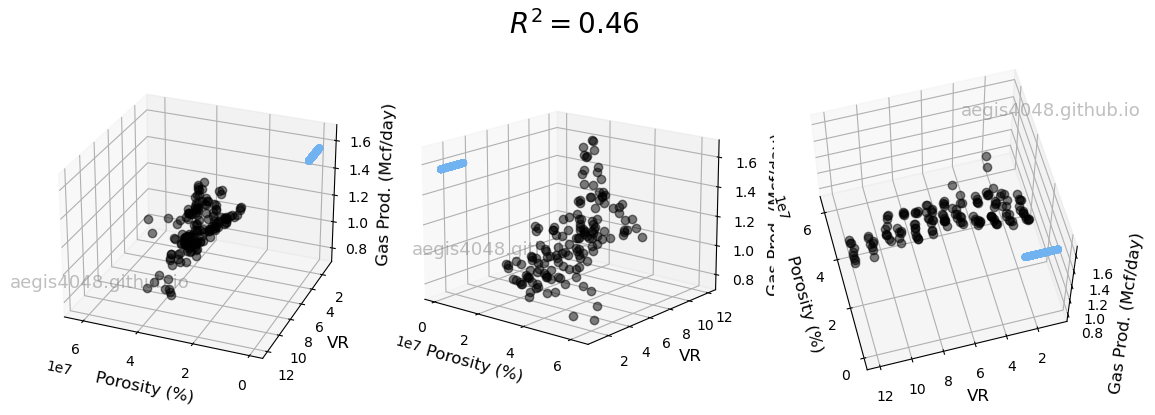

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################


df = dataset_2bp
df.info

X = df[['Total Volume', 'Month']].values.reshape(-1,2)
Y = df['AveragePrice']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = svm.SVR()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('VR', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()